## Contents
- Import df with customer profile column
- Bar charts for region and customer profile frequency  
- Stacked barplot comparing region and customer profile
- Stacked barplot comparing department id and customer profile  
Redoing some earlier visualizations and answering questions not previously answered:
- Loyalty barplot
- Highest freq by department
- Export

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

In [2]:
path = r"C:\Users\Kieran\Documents\Career Foundry\Data Immersion\4.0 Python\Instacart Basket Analysis"

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Customer Profile.pkl'))

## Q9
Produce suitable charts to illustrate your results and export them in your project folder.

### Bar chart - region

<AxesSubplot:>

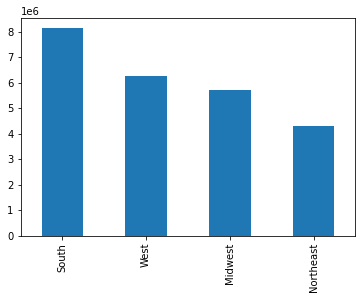

In [4]:
df['region'].value_counts().plot.bar()

### Bar chart - customer profile

<AxesSubplot:>

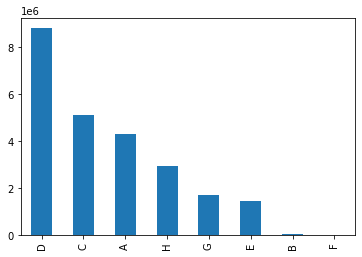

In [5]:
df['customer_profile'].value_counts().plot.bar()

### Stacked barplot

In [6]:
# create crosstab for region and customer profile
ct = pd.crosstab(df['region'], df['customer_profile'])

<AxesSubplot:xlabel='region'>

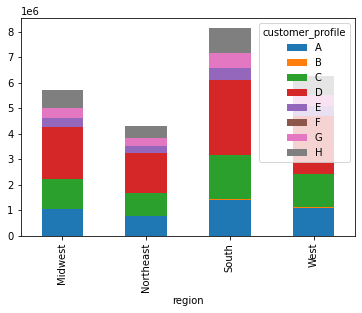

In [7]:
#plot stacked
ct.plot.bar(stacked=True)

The legend is obstructing the data.

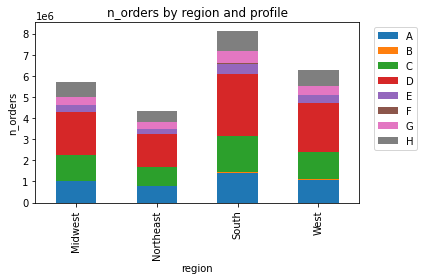

In [29]:
region_bar = ct.plot.bar(stacked=True, edgecolor='none')

horiz_offset = 1.03
vert_offset = 1.
region_bar.legend(bbox_to_anchor=(horiz_offset, vert_offset))
plt.title('n_orders by region and profile')
plt.ylabel('n_orders')
plt.tight_layout()

In [9]:
# crosstab for department id and profile
ct2 = pd.crosstab(df['department_id'], df['customer_profile'])

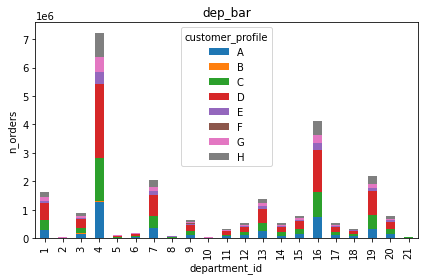

In [31]:
dep_bar = ct2.plot.bar(stacked=True)
plt.ylabel('n_orders')
plt.title('dep_bar')
plt.tight_layout()

A lot of my visualizations from previous exercises had parts cropped out when the image was exported. Most did not have ylabels or titles. I have learnt how to avoid this now (plt.tight_layout()) so will re-do some of the visualizations here.

### Number of customer orders by loyalty flag - barplot

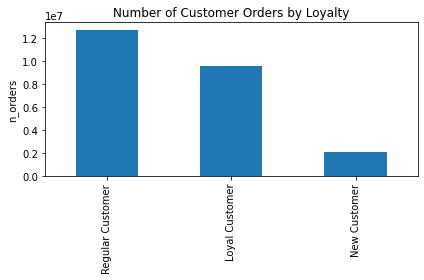

In [34]:
loyal_bar = df['loyalty_flag'].value_counts().plot.bar()
plt.ylabel('n_orders')
plt.title('Number of Customer Orders by Loyalty')
plt.tight_layout()

## Highest freq of orders by dep

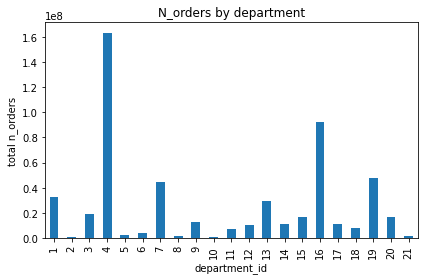

In [50]:
order_dep = df.groupby('department_id').agg({'order_number': ['sum']}).plot.bar()
plt.ylabel('total n_orders')
plt.title('N_orders by department')
plt.tight_layout()
plt.legend().remove()

## Exporting graphs

In [30]:
region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_bar2.png'))

In [32]:
dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_bar2.png'))

In [37]:
loyal_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyal_flag_bar2.png'))

In [51]:
order_dep.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_dep.png'))